In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 40.0MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [53]:
data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [10]:
data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [11]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**First let's unite RCB, as it was BRC before**

In [48]:
data.batting_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data.bowling_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [13]:
data2.team1.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.team2.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [14]:
data2.toss_winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [15]:
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Let's go on now -**
**KKR V RCB -  Q1**

In [16]:
data_f = data2.loc[data2.team1.isin(['Royal Challengers Bangalore', 'Kolkata Knight Riders'])] 
data_f = data_f.loc[data_f.team2.isin(['Royal Challengers Bangalore', 'Kolkata Knight Riders'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
44,45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
87,88,2008,Kolkata,2008-05-08,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,SC Ganguly,Eden Gardens,Asad Rauf,IL Howell,NaN
133,134,2009,Durban,2009-04-29,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Kingsmead,MR Benson,TH Wijewardene,NaN
155,156,2009,Centurion,2009-05-12,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,LRPL Taylor,SuperSport Park,M Erasmus,SS Hazare,NaN
177,178,2010,Kolkata,2010-03-14,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,MK Tiwary,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN
216,217,2010,Bangalore,2010-04-10,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,R Vinay Kumar,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
257,258,2011,Kolkata,2011-04-22,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Eden Gardens,SS Hazare,RB Tiffin,NaN
290,291,2011,Bangalore,2011-05-14,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN


Finally , We have got a complete dataset for all the matches of  KKR Vs RCB 

**Let's do Q1 now**

KKR Wins - 14
RCB Wins - 10


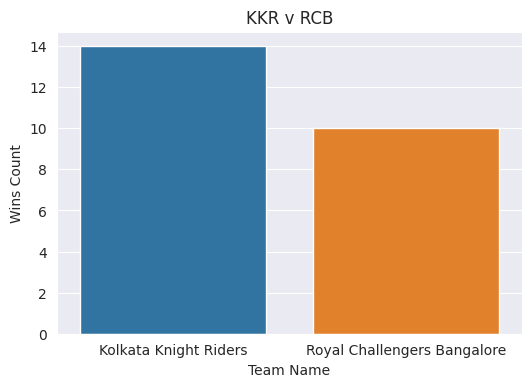

In [18]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('KKR v RCB')
A,B =data_f.winner.value_counts()

print('KKR Wins -',A)
print('RCB Wins -',B)

plt.show()


Well, I got it correct , crosschecked this record on Google

Let's mark KKR there .

Also I am a KKR Fan. AMI KKR 

In [19]:
data_f = data2.loc[data2.team1.isin(['Royal Challengers Bangalore', 'Kolkata Knight Riders'])] 
data_f = data_f.loc[data_f.team2.isin(['Royal Challengers Bangalore', 'Kolkata Knight Riders'])] 
data_f = data_f.loc[data_f.city.isin(['Sharjah'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
467,468,2014,Sharjah,2014-04-24,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium,Aleem Dar,VA Kulkarni,NaN


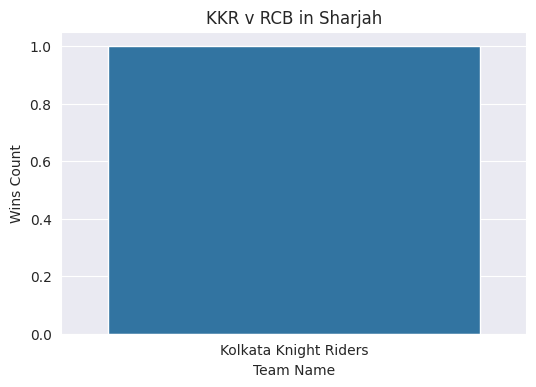

In [22]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('KKR v RCB in Sharjah')


plt.show()

KKR has a clear advantage here .

Also, RCB opted to bowl first here and lost the match.

So, Tomorrow again, AMI KKR.

For Question 2 , There can't be much analysis performed as we have only one match between them here and we got the result.

As match is in Sharjah , Last 3 teams here won by batting first in this IPL.

So, I hope tomorrow winning captain will choose to bat first.

**For Q3, Let's analyze Dinesh Kartik's record v RCB**

In [49]:
data_h = data.loc[data.batting_team.isin(['Kolkata Knight Riders'])]
data_h = data_h.loc[data.bowling_team.isin(['Royal Challengers Bangalore'])]
data_h = data_h.loc[data.batsman.isin(['KD Karthik'])]

data_h


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
151113,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,8,5,KD Karthik,N Rana,UT Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
151114,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,8,6,KD Karthik,N Rana,UT Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
151115,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,1,KD Karthik,N Rana,K Khejroliya,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
151117,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,3,KD Karthik,N Rana,K Khejroliya,0,0,0,1,0,0,1,1,2,NaN,NaN,NaN
151119,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,5,KD Karthik,N Rana,K Khejroliya,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
151120,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,6,KD Karthik,N Rana,K Khejroliya,0,1,0,0,0,0,1,1,2,NaN,NaN,NaN
151121,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,7,KD Karthik,N Rana,K Khejroliya,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
151124,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,10,3,KD Karthik,N Rana,UT Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
151128,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,11,1,KD Karthik,N Rana,Washington Sundar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
151132,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,11,5,KD Karthik,N Rana,Washington Sundar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [50]:
data_h.batsman.value_counts() # Used it to find the correct name of Karthik . OMG it's KD Karthik

KD Karthik    57
Name: batsman, dtype: int64

In [31]:
data_h.batsman_runs.sum() # Total of DK's runs v RCB as a KKR Player

82

As Karthik's has been in quite a lot franchises let's find his overall record against RCB

And I want to mention that Yesterday I commited a blunder by not calculating Rohit's runs when he was in Deccan Chargers.

In [51]:

data_k = data.loc[data.bowling_team.isin(['Royal Challengers Bangalore'])]
data_k = data_k.loc[data.batsman.isin(['KD Karthik'])]

data_k

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4747,20,2,Gujarat Lions,Royal Challengers Bangalore,10,6,KD Karthik,BB McCullum,P Negi,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4748,20,2,Gujarat Lions,Royal Challengers Bangalore,10,7,KD Karthik,BB McCullum,P Negi,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4751,20,2,Gujarat Lions,Royal Challengers Bangalore,11,3,KD Karthik,BB McCullum,S Aravind,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
4754,20,2,Gujarat Lions,Royal Challengers Bangalore,11,6,KD Karthik,BB McCullum,S Aravind,0,0,0,0,0,0,0,0,0,KD Karthik,caught,V Kohli
17739,76,1,Delhi Daredevils,Royal Challengers Bangalore,17,2,KD Karthik,G Gambhir,DW Steyn,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168892,11153,2,Kolkata Knight Riders,Royal Challengers Bangalore,16,6,KD Karthik,AD Russell,YS Chahal,0,0,0,1,0,0,1,1,2,NaN,NaN,NaN
168893,11153,2,Kolkata Knight Riders,Royal Challengers Bangalore,17,1,KD Karthik,AD Russell,N Saini,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
168897,11153,2,Kolkata Knight Riders,Royal Challengers Bangalore,17,5,KD Karthik,AD Russell,N Saini,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
168898,11153,2,Kolkata Knight Riders,Royal Challengers Bangalore,17,6,KD Karthik,AD Russell,N Saini,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN


In [34]:
data_k.batsman_runs.sum() # DK v RCB Overall Runs

419

In [39]:
data_k.match_id.nunique() # DK matches v RCB

20

In [41]:
data_k.player_dismissed.value_counts() # Finding how many times he has been dismissed to find the  proper average

KD Karthik    17
Name: player_dismissed, dtype: int64

In [45]:
np.round(419/17,2) # Average of DK v RCB

24.65

DK's record v RCB hasn't been that much impressive.

Although average of 24 seems to be fine at his position in T20's.

As per his last innings , He is an inform player

I hope he will score 21-35 tomorrow.

It also includes his average runs also v RCB.





**Let's move on to Q4 now**

Let's find average no ball in KKR v RCB contest


In [52]:
data_n = data.loc[data.batting_team.isin(['Royal Challengers Bangalore','Kolkata Knight Riders'])]
data_n = data_n.loc[data.bowling_team.isin(['Royal Challengers Bangalore','Kolkata Knight Riders'])]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6254,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SP Narine,G Gambhir,S Badree,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6255,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,SP Narine,G Gambhir,S Badree,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
6256,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,SP Narine,G Gambhir,S Badree,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
6257,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,SP Narine,G Gambhir,S Badree,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
6258,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,SP Narine,G Gambhir,S Badree,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173253,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,2,N Rana,AD Russell,M Ali,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
173254,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,3,AD Russell,N Rana,M Ali,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
173255,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,4,AD Russell,N Rana,M Ali,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
173256,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,5,AD Russell,N Rana,M Ali,0,0,0,0,0,0,0,0,0,AD Russell,run out,V Kohli


In [55]:
data_n.match_id.nunique() # Just for verifying I got 24 or not

24

In [56]:
data_n.noball_runs.sum()

23

In [57]:
np.round(24/23,2)

1.04

So, On an average in KKR v RCB , there is only approx 1 No ball

But, I will be marking 2 in the column, As it's normal to have one no ball from both the innings.

**Let's move to Q5 now**

**Virat v KKR**


In [59]:
data_v = data.loc[data.bowling_team.isin(['Kolkata Knight Riders'])]
data_h = data_v.loc[data.batting_team.isin(['Royal Challengers Bangalore'])]
data_v = data_v.loc[data.batsman.isin(['V Kohli'])]

data_v

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6378,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,V Kohli,CH Gayle,NM Coulter-Nile,0,0,0,0,0,0,0,0,0,V Kohli,caught,MK Pandey
10408,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,V Kohli,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
10409,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,V Kohli,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
10410,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,V Kohli,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
10411,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,V Kohli,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173121,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,19,4,V Kohli,MP Stoinis,P Krishna,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
173122,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,19,5,V Kohli,MP Stoinis,P Krishna,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
173124,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,1,V Kohli,MP Stoinis,H Gurney,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
173128,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,5,V Kohli,MP Stoinis,H Gurney,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [60]:
data_v.batsman_runs.sum() # VK v KKR Overall Runs

675

In [61]:
data_v.match_id.nunique()

21

In [62]:
data_v.player_dismissed.value_counts()

V Kohli    18
Name: player_dismissed, dtype: int64

In [67]:
np.round(675/18,2)

37.5

That's a good performance by VK v KKR

Let's find his average fours v KKR

In [66]:
data_v.batsman_runs.value_counts()

1    215
0    173
4     58
2     45
6     22
3      2
Name: batsman_runs, dtype: int64

In [68]:
np.round(58/21,2) # Average Fours v KKR

2.76

So, VK scores average 2 to 3 fours v KKR in every match

Let's mark  3 there .

Thank You again for this amazing internship.

When I saw it , I was just like WOW! , What an Idea!

I am improving in Analysis Day by Day.

Yesterday , I commited a mistake with Rohit's analysis. Hope I don't commit mistakes like this now in future .

Looking forward to it tomorrow.


Regards,

Ashaab Rizvi

